In [16]:
from keras.datasets import mnist
import numpy as np
import h5py
import os
import requests
import json

In [2]:
def get_mnist():
    """
    Returns the train and test splits of the MNIST digits dataset,
    where x_train and x_test are shaped into the tensorflow image data
    shape and normalized to fit in the range [0, 1]
    """
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    # reshape and standardize x arrays
    x_train = np.expand_dims(x_train, -1) / 255
    x_test = np.expand_dims(x_test, -1) / 255
    return x_train, x_test, y_train, y_test

In [3]:
def load_spectral_data(data_path, dset):
    h = h5py.File(os.path.join(data_path, '%s_spectralnet.hdf5' % dset))
    keys = [k for k in sorted(h.keys()) if k.startswith('spectral')]
    spectral_dict = dict()
    for k in keys:
        _, k_i, i = k.split('-')
        l = spectral_dict.get(k_i, [])
        l.append(h[k].value)
        spectral_dict[k_i] = l

    ret_dict = dict()
    ret_dict["spectral"] = spectral_dict
    ret_dict["p_train"] = h["p_train"].value
    ret_dict["p_val"] = h["p_val"].value

    return ret_dict

In [11]:
x_train_raw, x_test_raw, y_train_raw, y_test_raw = get_mnist()

In [8]:
data = load_spectral_data('/tmp/data', 'mnist')

/Users/ryadhkhisb/anaconda2/envs/nn/lib/python3.7/site-packages/ipykernel_launcher.py:2: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  
/Users/ryadhkhisb/anaconda2/envs/nn/lib/python3.7/site-packages/ipykernel_launcher.py:8: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  
/Users/ryadhkhisb/anaconda2/envs/nn/lib/python3.7/site-packages/ipykernel_launcher.py:13: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  del sys.path[0]
/Users/ryadhkhisb/anaconda2/envs/nn/lib/python3.7/site-packages/ipykernel_launcher.py:14: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  


In [9]:
x_train, y_train, x_val, y_val, x_test, y_test = data['spectral']['train_and_test']

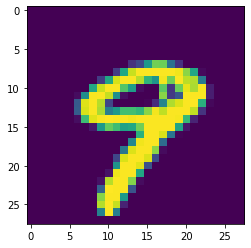

In [12]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline

idx = 9
x_train[idx].reshape((-1)), y_train[idx]
imshow(x_test_raw[idx].reshape((28, 28)))


In [15]:

for idx in range(10):
    data = json.dumps({"data": {"ndarray":[list(x_test_raw[idx].reshape(-1))]}})

    r = requests.post('http://localhost:5000/predict', data={"json": data})
    print(idx, r.json(), y_test_raw[idx])

NameError: name 'requests' is not defined

In [86]:
r.content

b'{"data":{"names":[],"ndarray":[3.0,2.0,9.0,0.0,7.0,1.0,4.0,7.0,5.0,9.0]},"meta":{}}\n'

In [18]:
X = x_test_raw[:1]
l = [X[i].reshape(-1).tolist() for i in np.ndindex(X.shape[:1])]
data = json.dumps({"data": {"ndarray":l}})
print({"json": data})
r = requests.post('http://localhost:5000/predict', data={"json": data})
r.json()

{'json': '{"data": {"ndarray": [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [99]:
r.content

b'{"data":{"names":[],"ndarray":[1.0,0.0,4.0,1.0,4.0,9.0,5.0,9.0,0.0,6.0]},"meta":{}}\n'

In [45]:
import numpy as np
import tensorflow as tf

train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3])

n_samples = train_X.shape[0]
batch_size = 100

total_epochs = 50

X = tf.placeholder('float')
y = tf.placeholder('float')

W = tf.Variable(np.random.randn(), name="weights")
b = tf.Variable(np.random.randn(), name="bias")

y_pred = tf.add(tf.multiply(X, W), b)

cost = tf.reduce_sum(tf.pow(y_pred-y, 2))/(2*n_samples) #L2 loss
optimizer = tf.train.AdamOptimizer().minimize(cost) #Gradient 

init = tf.initialize_all_variables()

with tf.Session() as sess:
    sess.run(init)
    print("Initial values for W and b: ", W.eval(), b.eval())
    for _ in range(total_epochs):
        sess.run(optimizer, feed_dict={X: train_X, y: train_Y})
    print("Value for W and b after GD: ", W.eval(), b.eval())

Initial values for W and b:  0.4322601 0.107851684
Value for W and b after GD:  0.3876748 0.06505611
